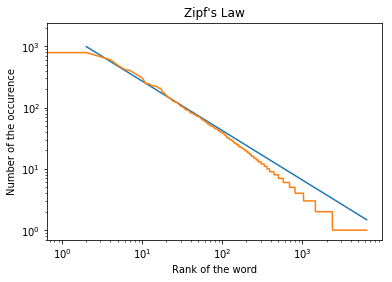

the fitting equation is y=1738.62(x^-0.81)
the covariences for these two parameters are: [[ 1.53537e+01 -2.84000e-03]
 [-2.84000e-03  0.00000e+00]]


In [116]:
fp = open('Alice.txt','r',encoding='UTF-8')
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
line = fp.readline()
my_dict={}
#read the first line from the title
def func(K,amp,alpha):
    return amp*(K**alpha)
while line:
    s=line.split()
    for a in s:
        if a not in my_dict:
            my_dict[a]=1
        else:
            my_dict[a]=my_dict[a]+1    
    line = fp.readline()
fp.close()
D=[]
for key in my_dict:
    D.append(my_dict[key])
D.sort()
D.reverse()
C=range(1,len(D)+1)
#print(C)
popt,pcov=curve_fit(func,C,D,maxfev=800)
#print(len(D))
K=np.linspace(C[1],C[-1],100000)
plt.plot(K,func(K,*popt))
plt.loglog(range(len(D)),D)
plt.xlabel('Rank of the word')
plt.ylabel('Number of the occurence')
plt.title("Zipf's Law")
plt.show()
print('the fitting equation is y='+str('%.2f'%popt[0])+'(x^'+str('%.2f'%popt[1])+')')
print('the covariences for these two parameters are: '+str(np.around(pcov,5)))

In [89]:
help(curve_fit)

Help on function curve_fit in module scipy.optimize.minpack:

curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, **kwargs)
    Use non-linear least squares to fit a function, f, to data.
    
    Assumes ``ydata = f(xdata, *params) + eps``
    
    Parameters
    ----------
    f : callable
        The model function, f(x, ...).  It must take the independent
        variable as the first argument and the parameters to fit as
        separate remaining arguments.
    xdata : An M-length sequence or an (k,M)-shaped array for functions with k predictors
        The independent variable where the data is measured.
    ydata : M-length sequence
        The dependent data --- nominally f(xdata, ...)
    p0 : None, scalar, or N-length sequence, optional
        Initial guess for the parameters.  If None, then the initial
        values will all be 1 (if the number of parameters for the function
        can be det